In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

### **Initialize Data**

In [ ]:
df_superstore = pd.read_csv('/content/drive/MyDrive/BANA 630 - Prescriptive Analytics/BANA 630 Group Project/superstore_data.csv')

In [ ]:
df_superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Ship Status,Customer ID,Customer Name,Segment,...,Quantity,Discount,Profit,Sales Forecast,Sales Target,Price,Profit Ratio,Sales Target Status,forecast_bias,Sales Forecast Status
0,CA-2017-103800,2017-01-03,2017-01-07,Standard Class,4,6,Shipped Early,DP-13000,Darren Powers,Consumer,...,2,20.0,6.0,25.0,15,8.00,37.50,Target Achieved,9.0,Over Forecast
1,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,3,20.0,4.0,18.0,300,4.00,33.33,Target Not Achieved,6.0,Over Forecast
2,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,3,20.0,-65.0,408.0,300,91.00,-23.81,Target Not Achieved,135.0,Over Forecast
3,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,2,80.0,-5.0,5.0,300,2.00,-125.00,Target Not Achieved,1.0,Over Forecast
4,CA-2017-141817,2017-01-05,2017-01-12,Standard Class,7,6,Shipped Late,MB-18085,Mick Brown,Consumer,...,3,20.0,5.0,29.0,21,6.67,25.00,Target Not Achieved,9.0,Over Forecast


In [ ]:
df_superstore.shape

(9986, 30)

In [ ]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order ID                9986 non-null   object 
 1   Order Date              9986 non-null   object 
 2   Ship Date               9986 non-null   object 
 3   Ship Mode               9986 non-null   object 
 4   Days to Ship Actual     9986 non-null   int64  
 5   Days to Ship Scheduled  9986 non-null   int64  
 6   Ship Status             9986 non-null   object 
 7   Customer ID             9986 non-null   object 
 8   Customer Name           9986 non-null   object 
 9   Segment                 9986 non-null   object 
 10  Country/Region          9986 non-null   object 
 11  City                    9986 non-null   object 
 12  State                   9986 non-null   object 
 13  Postal Code             9986 non-null   float64
 14  Region                  9986 non-null   

### **Check for Duplicates and Missing Values**

In [ ]:
# Check for duplicates
duplicates = df_superstore.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Check for missing values
missing_values = df_superstore.isnull().sum()
print(missing_values)

Order ID                  0
Order Date                0
Ship Date                 0
Ship Mode                 0
Days to Ship Actual       0
Days to Ship Scheduled    0
Ship Status               0
Customer ID               0
Customer Name             0
Segment                   0
Country/Region            0
City                      0
State                     0
Postal Code               0
Region                    0
Product ID                0
Category                  0
Sub-Category              0
Product Name              0
Sales                     0
Quantity                  0
Discount                  0
Profit                    0
Sales Forecast            0
Sales Target              0
Price                     0
Profit Ratio              0
Sales Target Status       0
forecast_bias             0
Sales Forecast Status     0
dtype: int64


### **Feature Engineering for Predictive Analysis**

In [ ]:
# Create Days to Ship Difference
df_superstore['Days to Ship Difference'] = df_superstore['Days to Ship Actual'] - df_superstore['Days to Ship Scheduled']

In [ ]:
# Categorize Profit Ratio
bins = [-np.inf, 0, 0.2, 0.5, np.inf]
labels = ['Loss', 'Low', 'Medium', 'High']
df_superstore['Profit Ratio Category'] = pd.cut(df_superstore['Profit Ratio'], bins=bins, labels=labels)

In [ ]:
# Create Forecast Accuracy (binary)
df_superstore['Forecast Accuracy'] = np.where(df_superstore['Sales'] >= df_superstore['Sales Forecast'], 1, 0)

In [ ]:
# Convert date columns to datetime objects
df_superstore['Order Date'] = pd.to_datetime(df_superstore['Order Date'])
df_superstore['Ship Date'] = pd.to_datetime(df_superstore['Ship Date'])

### **Data Transformation**

In [ ]:
#Encode Categorical Variables for Prediction Models

# List of columns to encode
columns_to_encode = ['Segment', 'State', 'Region', 'Category', 'Sub-Category','Sales Target Status','Sales Forecast Status']

# Dictionary to store mappings for each column
label_mappings = {}

for col in columns_to_encode:
    # Create LabelEncoder instance
    encoder = LabelEncoder()

    # Create a new encoded column
    df_superstore[f'{col}_Encoded'] = encoder.fit_transform(df_superstore[col])

    # Save the mapping for reference
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the mappings
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}:")
    print(mapping)
    print()


Mapping for Segment:
{'Consumer': 0, 'Corporate': 1, 'Home Office': 2}

Mapping for State:
{'Alabama': 0, 'Arizona': 1, 'Arkansas': 2, 'California': 3, 'Colorado': 4, 'Connecticut': 5, 'Delaware': 6, 'District of Columbia': 7, 'Florida': 8, 'Georgia': 9, 'Idaho': 10, 'Illinois': 11, 'Indiana': 12, 'Iowa': 13, 'Kansas': 14, 'Kentucky': 15, 'Louisiana': 16, 'Maine': 17, 'Maryland': 18, 'Massachusetts': 19, 'Michigan': 20, 'Minnesota': 21, 'Mississippi': 22, 'Missouri': 23, 'Montana': 24, 'Nebraska': 25, 'Nevada': 26, 'New Hampshire': 27, 'New Jersey': 28, 'New Mexico': 29, 'New York': 30, 'North Carolina': 31, 'North Dakota': 32, 'Ohio': 33, 'Oklahoma': 34, 'Oregon': 35, 'Pennsylvania': 36, 'Rhode Island': 37, 'South Carolina': 38, 'South Dakota': 39, 'Tennessee': 40, 'Texas': 41, 'Utah': 42, 'Vermont': 43, 'Virginia': 44, 'Washington': 45, 'West Virginia': 46, 'Wisconsin': 47, 'Wyoming': 48}

Mapping for Region:
{'Central': 0, 'East': 1, 'South': 2, 'West': 3}

Mapping for Category:
{'F

### **Standardize Numerical Columns for Prediction**

In [ ]:
#Standardize numerical columns for prediction
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Sales', 'Profit', 'Discount', 'Price']
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_superstore[columns_to_scale])

# Create new column names for scaled data
scaled_column_names = [f"{col}_Scaled" for col in columns_to_scale]

# Add the scaled data as new columns to the DataFrame
df_superstore[scaled_column_names] = scaled_data

# Check the updated DataFrame
print(df_superstore[[*columns_to_scale, *scaled_column_names]].head())


   Sales  Profit  Discount  Price  Sales_Scaled  Profit_Scaled  \
0   16.0     6.0      20.0   8.00     -0.342894      -0.096391   
1   12.0     4.0      20.0   4.00     -0.349312      -0.104928   
2  273.0   -65.0      20.0  91.00      0.069432      -0.399437   
3    4.0    -5.0      80.0   2.00     -0.362147      -0.143342   
4   20.0     5.0      20.0   6.67     -0.336477      -0.100659   

   Discount_Scaled  Price_Scaled  
0         0.211838     -0.370150  
1         0.211838     -0.398128  
2         0.211838      0.210391  
3         3.117565     -0.412117  
4         0.211838     -0.379453  


In [ ]:
df_superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Ship Status,Customer ID,Customer Name,Segment,...,State_Encoded,Region_Encoded,Category_Encoded,Sub-Category_Encoded,Sales Target Status_Encoded,Sales Forecast Status_Encoded,Sales_Scaled,Profit_Scaled,Discount_Scaled,Price_Scaled
0,CA-2017-103800,2017-01-03,2017-01-07,Standard Class,4,6,Shipped Early,DP-13000,Darren Powers,Consumer,...,41,0,1,12,0,1,-0.342894,-0.096391,0.211838,-0.370150
1,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,11,0,1,10,1,1,-0.349312,-0.104928,0.211838,-0.398128
2,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,11,0,1,14,1,1,0.069432,-0.399437,0.211838,0.210391
3,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,11,0,1,3,1,1,-0.362147,-0.143342,3.117565,-0.412117
4,CA-2017-141817,2017-01-05,2017-01-12,Standard Class,7,6,Shipped Late,MB-18085,Mick Brown,Consumer,...,36,1,1,2,1,1,-0.336477,-0.100659,0.211838,-0.379453


In [ ]:
print(df_superstore[['Sales', 'Sales_Scaled']].head())


   Sales  Sales_Scaled
0   16.0     -0.342894
1   12.0     -0.349312
2  273.0      0.069432
3    4.0     -0.362147
4   20.0     -0.336477


### **Predictive Modeling**

In [ ]:
# List of scaled numerical features
scaled_features = ['Sales_Scaled', 'Discount_Scaled', 'Price_Scaled']

# Include all one-hot or label-encoded categorical features
categorical_features = [col for col in df_superstore.columns if col.startswith('Region_') or col.startswith('State_') or col.startswith('Category_')]

# Combine features
X = df_superstore[scaled_features + categorical_features]

# Target variable: Use Profit_Scaled for consistency if scaling is applied
y = df_superstore['Profit_Scaled']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

Mean Squared Error (MSE): 1.0570198663955404
Root Mean Squared Error (RMSE): 1.0281147146089975
R-Squared (R²): 0.17027230481158084


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean()}")


Cross-Validation R² Scores: [-0.36154349  0.2916342   0.45211556  0.26072418  0.22812029]
Mean R²: 0.17421014681957034


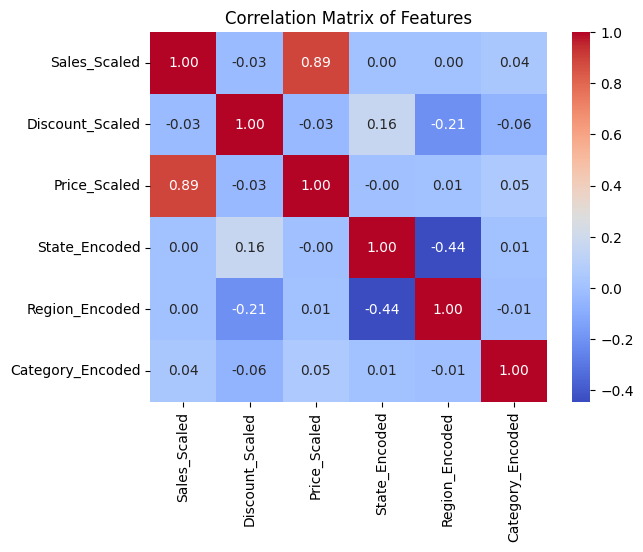

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
# Create a new feature combining correlated ones
df_superstore['Sales_Price_Sum'] = df_superstore['Sales_Scaled'] + df_superstore['Price_Scaled']
X = X.drop(columns=['Sales_Scaled', 'Price_Scaled'])
X['Sales_Price_Sum'] = df_superstore['Sales_Price_Sum']

In [ ]:
from sklearn.linear_model import Ridge

# Initialize and fit Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Evaluate Ridge model
y_pred_ridge = ridge_model.predict(X_test)
print(f"R-Squared (Ridge): {ridge_model.score(X_test, y_test)}")


R-Squared (Ridge): 0.17031275205244056


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


            feature       VIF
0   Discount_Scaled  1.054511
1     State_Encoded  1.992402
2    Region_Encoded  1.887164
3  Category_Encoded  2.620569
4   Sales_Price_Sum  1.002438


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline with Polynomial Features and Ridge Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))

# Train the polynomial model
poly_model.fit(X_train, y_train)

# Evaluate the polynomial model
y_poly_pred = poly_model.predict(X_test)
poly_r2 = poly_model.score(X_test, y_test)
print(f"R-Squared (Polynomial + Ridge): {poly_r2}")


R-Squared (Polynomial + Ridge): 0.4876556981796677


In [ ]:
# Create interaction features
df_superstore['Sales_Discount'] = df_superstore['Sales_Scaled'] * df_superstore['Discount_Scaled']

# Update features
X = df_superstore[scaled_features + ['Sales_Discount'] + categorical_features]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_r2 = rf_model.score(X_test, y_test)
print(f"R-Squared (Random Forest): {rf_r2}")


R-Squared (Random Forest): 0.3353096697175991


In [ ]:
print(f"Number of features used in training: {rf_model.n_features_in_}")
print(f"Number of columns in X: {len(X.columns)}")


Number of features used in training: 6
Number of columns in X: 7


In [ ]:
# Use only the features passed during model training
features_used_in_training = rf_model.feature_names_in_  # Available in scikit-learn 1.0+
X = X[features_used_in_training]

In [ ]:
# Extract feature importances
importances = rf_model.feature_importances_

# Create DataFrame with matching columns
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


            Feature  Importance
0      Sales_Scaled    0.649372
1   Discount_Scaled    0.175861
2      Price_Scaled    0.108317
3     State_Encoded    0.032512
4    Region_Encoded    0.019640
5  Category_Encoded    0.014297


In [ ]:
print(f"Feature importances length: {len(importances)}")
print(f"Number of columns in X: {len(X.columns)}")


Feature importances length: 6
Number of columns in X: 6


In [ ]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


            Feature  Importance
0      Sales_Scaled    0.649372
1   Discount_Scaled    0.175861
2      Price_Scaled    0.108317
3     State_Encoded    0.032512
4    Region_Encoded    0.019640
5  Category_Encoded    0.014297


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean()}")


Cross-Validation R² Scores: [-0.14933534  0.79352942  0.62002219  0.75291178  0.69551167]
Mean R²: 0.5425279434981526


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.38351265 0.83726382 0.67882735 0.71724782 0.85634383]
Mean R²: 0.694639095479624


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=kf, scoring='r2', verbose=1)
grid_search.fit(X, y)

# Best parameters and R² score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R²: {grid_search.best_score_}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best R²: 0.7039234919577966


In [ ]:
df_superstore['Predicted_Profit'] = rf_model.predict(X)

# Aggregate by region and state
region_profit = df_superstore.groupby('Region')['Predicted_Profit'].sum().sort_values(ascending=False)
state_profit = df_superstore.groupby('State')['Predicted_Profit'].sum().sort_values(ascending=False)

print("Profit by Region:")
print(region_profit)

print("Profit by State:")
print(state_profit)


Profit by Region:
Region
West        54.316998
East        41.920357
South       41.090786
Central   -117.844846
Name: Predicted_Profit, dtype: float64
Profit by State:
State
New York                170.000742
California               74.599386
Washington               66.057995
Michigan                 65.798795
Indiana                  49.390674
Virginia                 48.711689
Georgia                  42.075357
Minnesota                32.765959
New Jersey               29.847737
Delaware                 29.295735
Kentucky                 28.232695
Rhode Island             21.789561
Wisconsin                21.734672
Missouri                 20.163253
Alabama                  18.003619
Maryland                 13.665647
Oklahoma                 12.777711
Massachusetts            12.356221
Arkansas                  9.096435
Nevada                    8.789596
Mississippi               6.259044
Montana                   5.808461
Vermont                   5.757187
Utah                

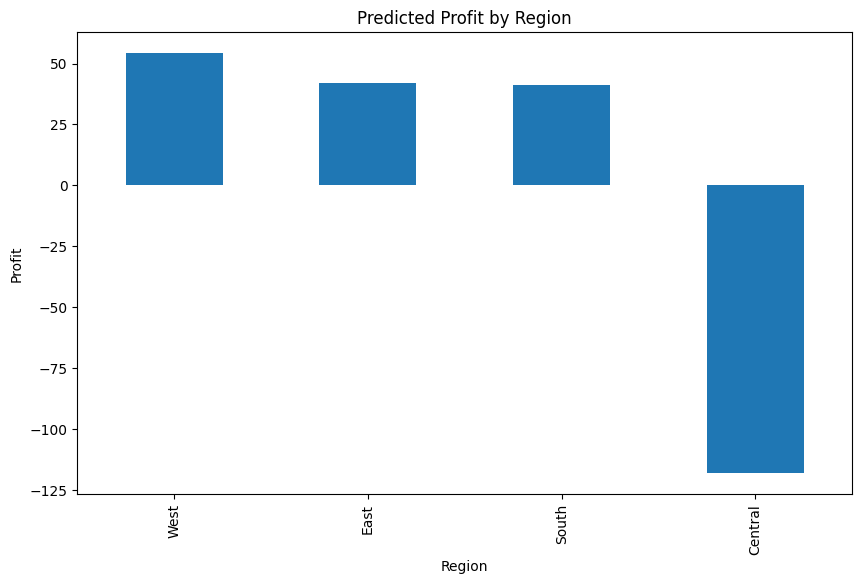

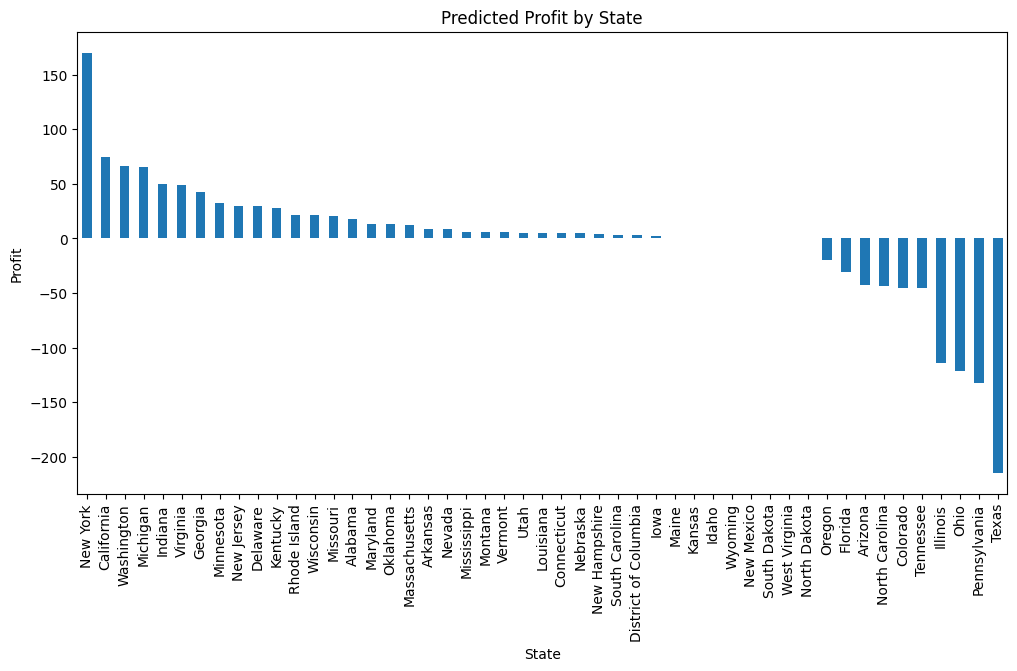

In [ ]:
import matplotlib.pyplot as plt

# Visualize profit by region
region_profit.plot(kind='bar', title='Predicted Profit by Region', figsize=(10, 6))
plt.ylabel('Profit')
plt.show()

# Visualize profit by state
state_profit.plot(kind='bar', title='Predicted Profit by State', figsize=(12, 6))
plt.ylabel('Profit')
plt.show()


In [ ]:
category_price_trends = df_superstore.groupby('Category')['Price_Scaled'].mean().sort_values()
print("Average Price by Category:")
print(category_price_trends)


Average Price by Category:
Category
Office Supplies   -0.201286
Furniture          0.209237
Technology         0.416678
Name: Price_Scaled, dtype: float64


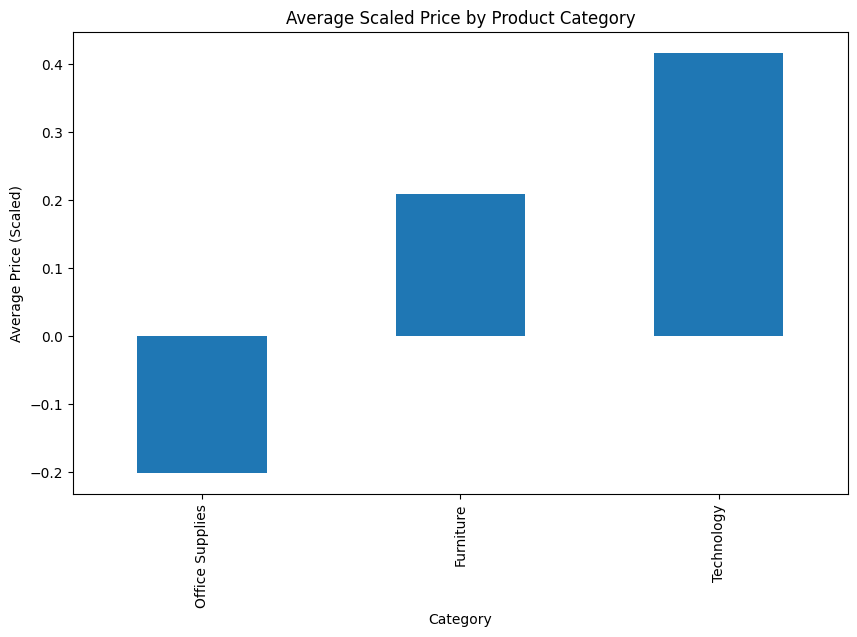

In [ ]:
category_price_trends.plot(kind='bar', title='Average Scaled Price by Product Category', figsize=(10, 6))
plt.ylabel('Average Price (Scaled)')
plt.xlabel('Category')
plt.show()


### **Feature Importance Analysis**

In [ ]:
categorical_features = ['Region_Encoded', 'State_Encoded', 'Category_Encoded']
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances for Categorical Features:")
print(importance_df[importance_df['Feature'].isin(categorical_features)])


Feature Importances for Categorical Features:
            Feature  Importance
3     State_Encoded    0.032512
4    Region_Encoded    0.019640
5  Category_Encoded    0.014297


In [ ]:
importance_df.head()

,Feature,Importance
0,Sales_Scaled,0.649372
1,Discount_Scaled,0.175861
2,Price_Scaled,0.108317
3,State_Encoded,0.032512
4,Region_Encoded,0.019640


In [ ]:
print("Feature columns in X:")
print(X.columns)

print("Feature columns in importance_df:")
print(importance_df['Feature'])


Feature columns in X:
Index(['Sales_Scaled', 'Discount_Scaled', 'Price_Scaled', 'State_Encoded',
       'Region_Encoded', 'Category_Encoded'],
      dtype='object')
Feature columns in importance_df:
0        Sales_Scaled
1     Discount_Scaled
2        Price_Scaled
3       State_Encoded
4      Region_Encoded
5    Category_Encoded
Name: Feature, dtype: object


In [ ]:
categorical_features = [col for col in X.columns if 'Region' in col or 'State' in col or 'Category' in col]

print("Identified categorical features:")
print(categorical_features)


Identified categorical features:
['State_Encoded', 'Region_Encoded', 'Category_Encoded']


In [ ]:
# Filter feature importances for categorical features
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

categorical_importance_df = importance_df[importance_df['Feature'].isin(categorical_features)]

print("Feature Importances for Categorical Features:")
print(categorical_importance_df)


Feature Importances for Categorical Features:
            Feature  Importance
3     State_Encoded    0.032512
4    Region_Encoded    0.019640
5  Category_Encoded    0.014297


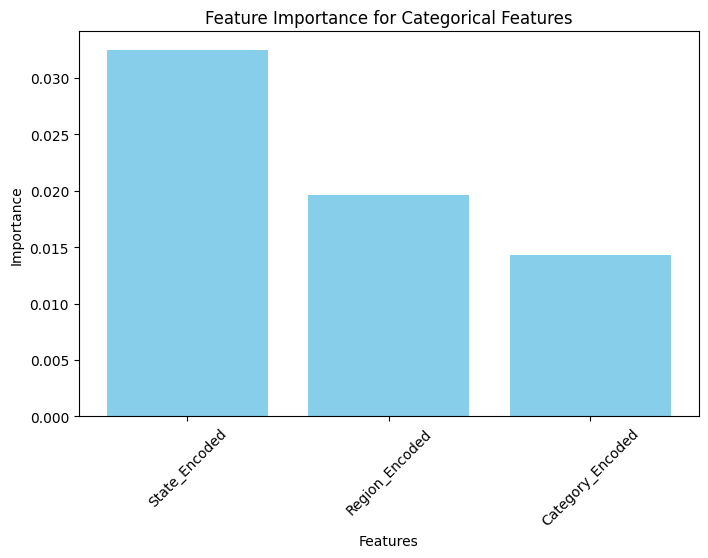

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance for categorical features
plt.figure(figsize=(8, 5))
plt.bar(categorical_importance_df['Feature'], categorical_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance for Categorical Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


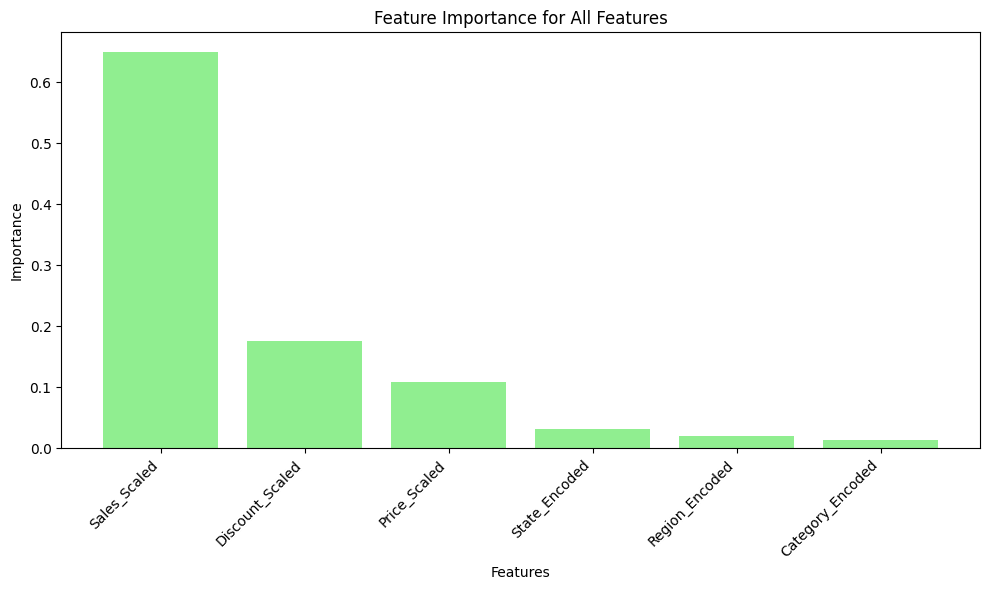

In [ ]:
# Plot all feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.title('Feature Importance for All Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Profitability by State Analysis**

In [ ]:
# Aggregate predicted profitability by state
state_profit = df_superstore.groupby('State')['Predicted_Profit'].sum().sort_values(ascending=False)

# Display the top states by predicted profit
print("Top States by Predicted Profitability:")
print(state_profit.head(10))  # Top 10 states


Top States by Predicted Profitability:
State
New York      170.000742
California     74.599386
Washington     66.057995
Michigan       65.798795
Indiana        49.390674
Virginia       48.711689
Georgia        42.075357
Minnesota      32.765959
New Jersey     29.847737
Delaware       29.295735
Name: Predicted_Profit, dtype: float64


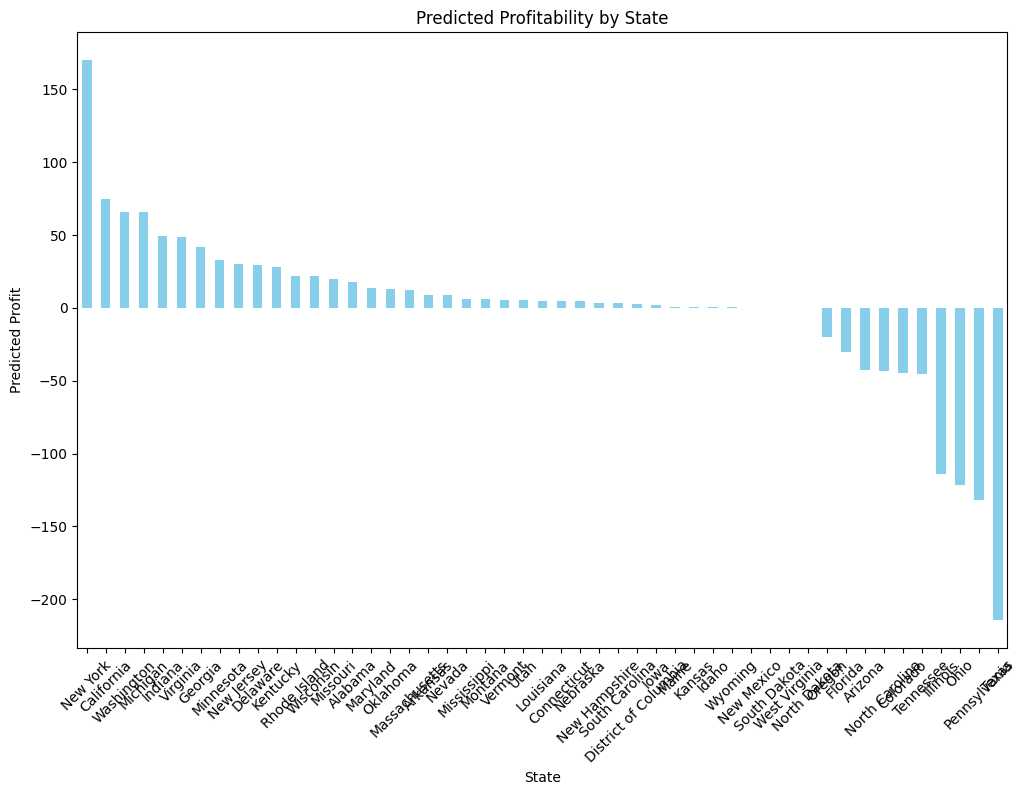

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted profit by state
plt.figure(figsize=(12, 8))
state_profit.plot(kind='bar', color='skyblue')
plt.title('Predicted Profitability by State')
plt.ylabel('Predicted Profit')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Aggregate sales, discounts, and prices by state
state_metrics = df_superstore.groupby('State').agg({
    'Sales': 'mean',
    'Discount': 'mean',
    'Price': 'mean',
    'Predicted_Profit': 'sum'
}).sort_values(by='Predicted_Profit', ascending=False)

# Display key metrics by state
print("State Metrics (Top 10 States by Predicted Profit):")
print(state_metrics.head(10))


State Metrics (Top 10 States by Predicted Profit):
                 Sales  Discount      Price  Predicted_Profit
State                                                        
New York    275.855368  5.536823  74.210364        170.000742
California  228.751124  7.276362  60.911959         74.599386
Washington  274.023715  6.403162  72.648557         66.057995
Michigan    299.141176  0.705882  82.685647         65.798795
Indiana     359.389262  0.000000  87.994631         49.390674
Virginia    314.206278  0.000000  77.508430         48.711689
Georgia     266.864130  0.000000  70.742446         42.075357
Minnesota   335.561798  0.000000  93.220449         32.765959
New Jersey  275.100000  0.461538  69.574769         29.847737
Delaware    285.968750  0.625000  83.561354         29.295735


### **Profit vs Average Sales by State**

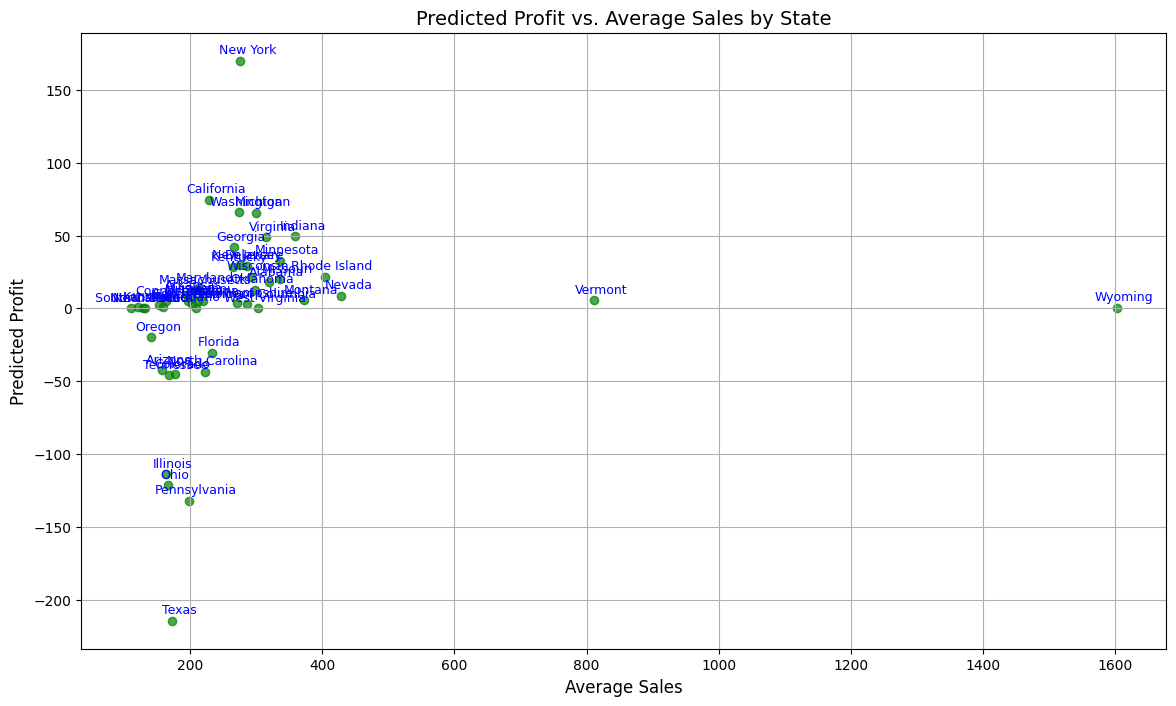

In [ ]:
# Plot profit vs. average sales with state labels
plt.figure(figsize=(14, 8))
plt.scatter(state_metrics['Sales'], state_metrics['Predicted_Profit'], color='green', alpha=0.7)

# Add labels to each point
for state, row in state_metrics.iterrows():
    plt.annotate(
        state,  # Label text
        (row['Sales'], row['Predicted_Profit']),  # Coordinates
        textcoords="offset points",  # Position text relative to the point
        xytext=(5, 5),  # Offset (x, y) in points
        ha='center', fontsize=9, color='blue'
    )

# Add title and labels
plt.title('Predicted Profit vs. Average Sales by State', fontsize=14)
plt.xlabel('Average Sales', fontsize=12)
plt.ylabel('Predicted Profit', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
top_states = state_metrics.head(10)  # Top 10 by Predicted Profit


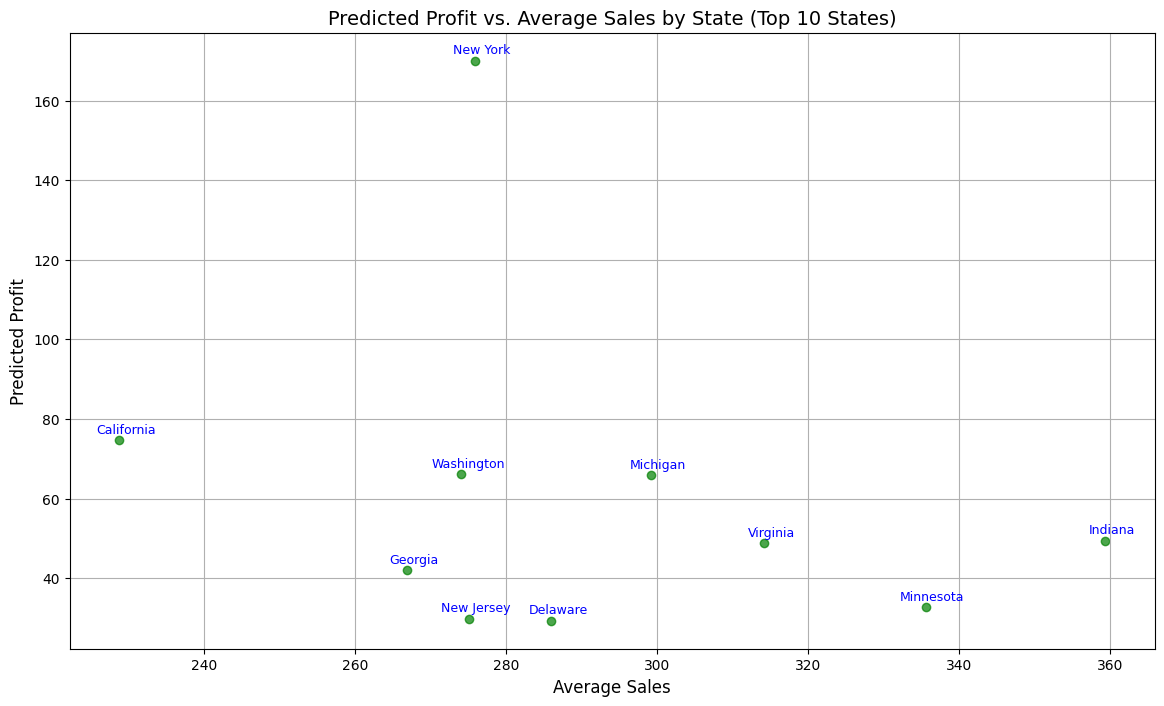

In [ ]:
# Plot profit vs. average sales with state labels
plt.figure(figsize=(14, 8))
plt.scatter(top_states['Sales'], top_states['Predicted_Profit'], color='green', alpha=0.7)

# Add labels to each point
for state, row in top_states.iterrows():
    plt.annotate(
        state,  # Label text
        (row['Sales'], row['Predicted_Profit']),  # Coordinates
        textcoords="offset points",  # Position text relative to the point
        xytext=(5, 5),  # Offset (x, y) in points
        ha='center', fontsize=9, color='blue'
    )

# Add title and labels
plt.title('Predicted Profit vs. Average Sales by State (Top 10 States)', fontsize=14)
plt.xlabel('Average Sales', fontsize=12)
plt.ylabel('Predicted Profit', fontsize=12)
plt.grid(True)
plt.show()

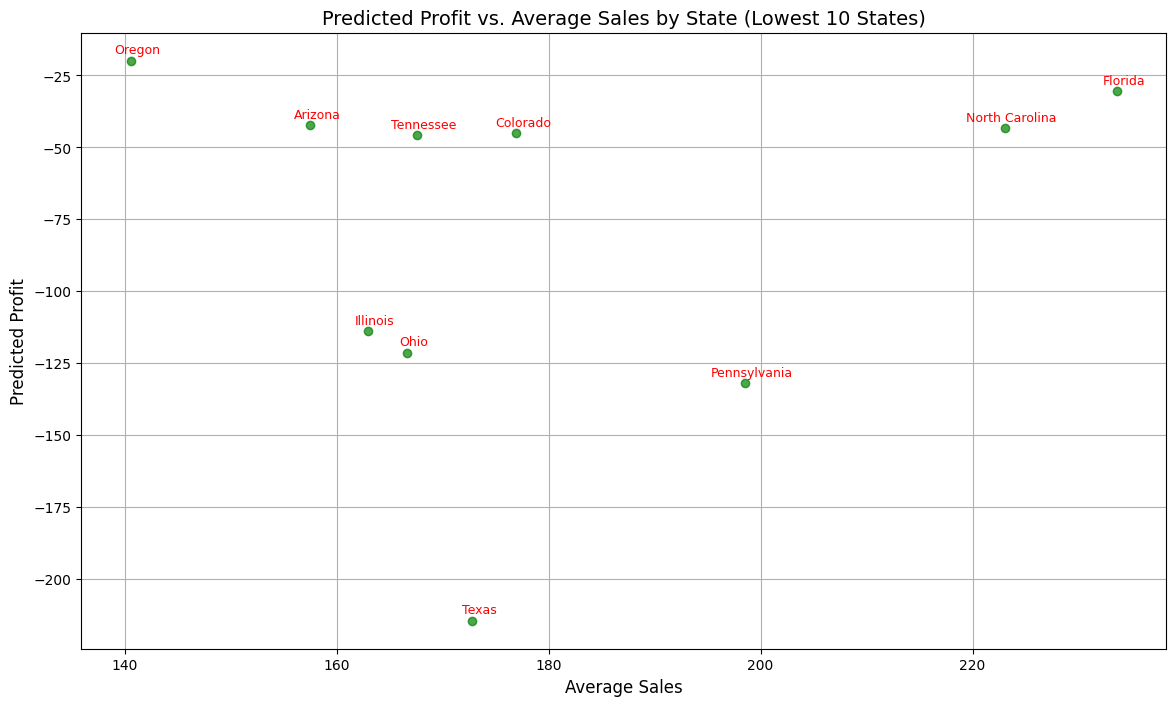

In [ ]:
# Select the lowest 10 states by predicted profit
lowest_states = state_metrics.tail(10)

# Plot profit vs. average sales with labels for lowest 10 states
plt.figure(figsize=(14, 8))
plt.scatter(lowest_states['Sales'], lowest_states['Predicted_Profit'], color='green', alpha=0.7)

# Annotate only the lowest 10 states
for state, row in lowest_states.iterrows():
    plt.annotate(
        state,  # Label text
        (row['Sales'], row['Predicted_Profit']),  # Coordinates
        textcoords="offset points",  # Position text relative to the point
        xytext=(5, 5),  # Offset (x, y) in points
        ha='center', fontsize=9, color='red'
    )

# Add title and labels
plt.title('Predicted Profit vs. Average Sales by State (Lowest 10 States)', fontsize=14)
plt.xlabel('Average Sales', fontsize=12)
plt.ylabel('Predicted Profit', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# Compare top 10 vs overall averages
top_states = state_metrics.head(10)
print("Metrics for Top 10 States:")
print(top_states)
overall_avg = state_metrics.mean()

comparison = pd.concat([top_states.mean(), overall_avg], axis=1)
comparison.columns = ['Top States Avg', 'Overall Avg']
print("Comparison of Metrics (Top 10 States vs Overall):")
print(comparison)


Metrics for Top 10 States:
                 Sales  Discount      Price  Predicted_Profit
State                                                        
New York    275.855368  5.536823  74.210364        170.000742
California  228.751124  7.276362  60.911959         74.599386
Washington  274.023715  6.403162  72.648557         66.057995
Michigan    299.141176  0.705882  82.685647         65.798795
Indiana     359.389262  0.000000  87.994631         49.390674
Virginia    314.206278  0.000000  77.508430         48.711689
Georgia     266.864130  0.000000  70.742446         42.075357
Minnesota   335.561798  0.000000  93.220449         32.765959
New Jersey  275.100000  0.461538  69.574769         29.847737
Delaware    285.968750  0.625000  83.561354         29.295735
Comparison of Metrics (Top 10 States vs Overall):
                  Top States Avg  Overall Avg
Sales                 291.486160   276.119064
Discount                2.100877     8.321964
Price                  77.305861    71.61

In [ ]:
# Analyze lowest 10 states
lowest_states = state_metrics.tail(10)
print("Metrics for Lowest 10 States:")
print(lowest_states)

# Compare lowest states to overall averages
comparison_low = pd.concat([lowest_states.mean(), overall_avg], axis=1)
comparison_low.columns = ['Lowest States Avg', 'Overall Avg']
print("Comparison of Metrics (Lowest 10 States vs Overall):")
print(comparison_low)


Metrics for Lowest 10 States:
                     Sales   Discount      Price  Predicted_Profit
State                                                             
Oregon          140.572581  28.870968  40.529355        -19.885222
Florida         233.626632  29.934726  57.409138        -30.380328
Arizona         157.513393  30.357143  43.178125        -42.335357
North Carolina  223.032258  28.387097  58.878750        -43.337453
Colorado        176.977901  31.712707  52.038619        -45.013297
Tennessee       167.551913  29.125683  43.256776        -45.663875
Illinois        162.930894  39.004065  45.949939       -113.850705
Ohio            166.606838  32.500000  48.147051       -121.311259
Pennsylvania    198.504259  32.862010  50.276457       -131.991411
Texas           172.778680  37.019289  44.619107       -214.418205
Comparison of Metrics (Lowest 10 States vs Overall):
                  Lowest States Avg  Overall Avg
Sales                    180.009535   276.119064
Discount       

In [ ]:
# Group by state and category to analyze contribution
state_category_metrics = df_superstore.groupby(['State', 'Category']).agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Predicted_Profit': 'sum'
}).sort_values(by='Predicted_Profit', ascending=False)

print("State-Category Metrics:")
print(state_category_metrics.head(50))  # Top 20 state-category combinations


State-Category Metrics:
                                  Sales   Discount  Predicted_Profit
State         Category                                              
New York      Technology       127496.0   0.673077        148.622049
California    Technology       159279.0  11.810585         78.615748
Washington    Technology        50544.0   8.400000         45.244916
Michigan      Office Supplies   37731.0   1.006289         37.323469
Indiana       Technology        26324.0   0.000000         31.036556
Virginia      Technology        24147.0   0.000000         24.163068
Minnesota     Office Supplies   19407.0   0.000000         23.593401
Delaware      Technology        14563.0   0.000000         23.519635
New York      Office Supplies   90009.0   5.241581         23.362677
Georgia       Office Supplies   26719.0   0.000000         23.182501
Florida       Technology        46968.0  22.608696         22.996577
Rhode Island  Technology        10475.0   0.000000         16.630730
Washington

### **Customer Segment Analysis**


*   Focus on Consumers:
    *   Double down on marketing strategies that cater to individual consumers
    *   Ensure product offerings align with consumer preferences, and maintain efficient pricing strategies
*   Boost Corporate Sales
*   Explore ways to increase Home Office Profitabilty or reduce support against this segment.



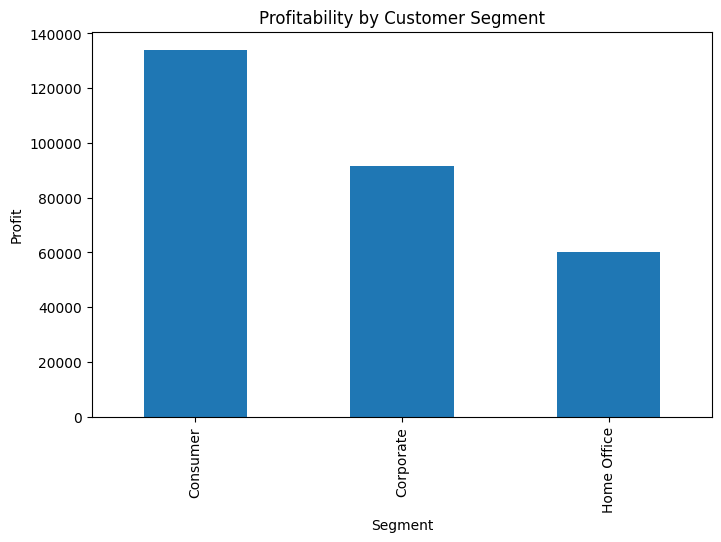

In [ ]:
# Group by customer segment
segment_metrics = df_superstore.groupby('Segment').agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).sort_values(by='Profit', ascending=False)

# Visualize profitability by customer segment
segment_metrics['Profit'].plot(kind='bar', title='Profitability by Customer Segment', figsize=(8, 5))
plt.ylabel('Profit')
plt.show()


### **Shipping Metrics Analysis**

*   The correlation coefficient for Shipping Delays and Profitability is nearly zero, indicating that shipping delays have minimal direct impact on profitability overall




In [ ]:
# Correlation between shipping delays and profitability
correlation = df_superstore['Days to Ship Difference'].corr(df_superstore['Profit'])
print(f"Correlation between shipping delays and profitability: {correlation}")

# Group delays by region
shipping_delays = df_superstore.groupby('Region')['Days to Ship Difference'].mean()
print("Average shipping delay by region:")
print(shipping_delays)


Correlation between shipping delays and profitability: 0.004150725224732755
Average shipping delay by region:
Region
Central   -0.388291
East      -0.346221
South     -0.399752
West      -0.336040
Name: Days to Ship Difference, dtype: float64


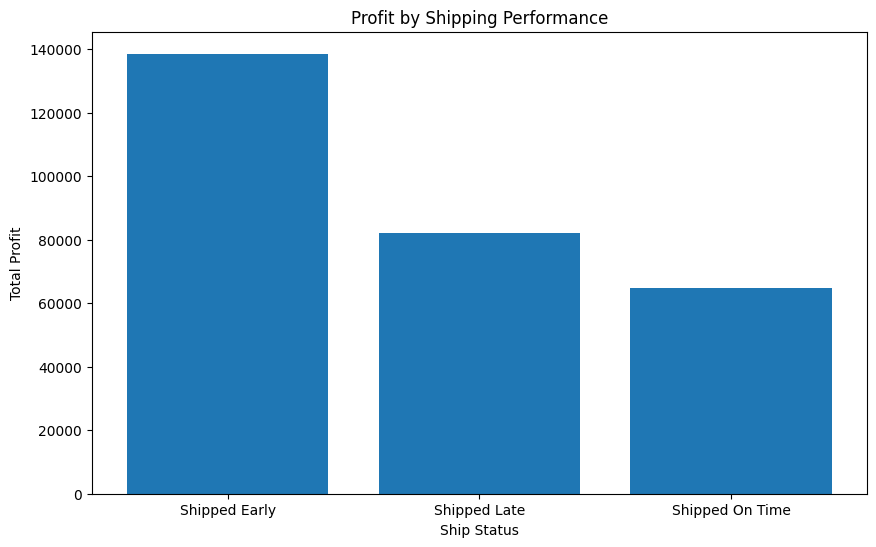

In [ ]:
# Shipping Performance
shipping_performance = df_superstore.groupby('Ship Status')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(shipping_performance['Ship Status'], shipping_performance['Profit'])
plt.title('Profit by Shipping Performance')
plt.xlabel('Ship Status')
plt.ylabel('Total Profit')
plt.show()

### **Product Profitability**

In [ ]:
# Group by product and calculate metrics
product_metrics = df_superstore.groupby('Product Name').agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).sort_values(by='Profit', ascending=False)

# Display top 10 profitable products
print(product_metrics.head(10))


                                                      Sales   Discount  \
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier               61600.0  12.000000   
Fellowes PB500 Electric Punch Plastic Comb Bind...  27454.0  24.000000   
Hewlett Packard LaserJet 3310 Copier                18840.0  20.000000   
Canon PC1060 Personal Laser Copier                  11620.0  15.000000   
HP Designjet T520 Inkjet Large Format Printer -...  18375.0  16.666667   
Ativa V4110MDD Micro-Cut Shredder                    7700.0   0.000000   
3D Systems Cube Printer, 2nd Generation, Magenta    14300.0   0.000000   
Plantronics Savi W720 Multi-Device Wireless Hea...   9368.0   5.714286   
Ibico EPK-21 Electric Binding System                15876.0  33.333333   
Zebra ZM400 Thermal Label Printer                    6966.0   0.000000   

                                                     Profit  
Product Name                                     

In [1]:
!jupyter nbconvert --to html BANA630_Phase_2.ipynb

[NbConvertApp] Converting notebook BANA630_Phase_2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 1165514 bytes to BANA630_Phase_2.html
